In [ ]:
from dateutil import parser

import pandas as pd

#datevar = "20230612"

start_date = str(12) + '-' + str(15) + '-' + str(2025)
start_date = parser.parse(start_date)
start_date = start_date.date()
print (start_date)

end_date = str(12) + '-' + str(21) + '-' + str(2025)
end_date = parser.parse(end_date)
end_date = end_date.date()
print (end_date)
print ("Date range:", start_date, "through", end_date)


path = ""


start_date_split = str(start_date).split("-")
syear = start_date_split[0]
smonth = start_date_split[1]
smonth = str(int(smonth))
sday = start_date_split[2]
sday = str(int(sday))

end_date_split = str(end_date).split("-")
eyear = end_date_split[0]
emonth = end_date_split[1]
emonth = str(int(emonth))
eday = end_date_split[2]
eday = str(int(eday))

date_range = smonth+"/"+sday+"/"+syear + "-" + emonth+"/"+eday+"/"+eyear

print (date_range)

df = pd.DataFrame({"Date Range": [date_range]}, index=[0])

df["Empty Stuff"] = "NYCHA"


df.to_csv(path + "Date_Range.csv", index=False)



In [ ]:
df

In [ ]:
import datetime
print (str(datetime.datetime.today() ) )

print ("Import packages")

import cx_Oracle

#create path to downloaded oracle files and initiate
cx_Oracle.init_oracle_client(lib_dir=r"C:\Oracle\instantclient_23_8")

import sqlalchemy
from sqlalchemy.schema import CreateIndex
from sqlalchemy import Table, Column, Integer, Numeric,String, ForeignKey
from sqlalchemy import MetaData
from sqlalchemy import insert
metadata= MetaData()

from sqlalchemy.engine import create_engine

print ("DONE")

### Sheet 1: Weekly Summary

Run this code to pull the weekly summary data, the data will be saved into a file named dustwipe_weekly_summary.csv

In [ ]:
import datetime
print (str(datetime.datetime.today()) )

print ("Import weekly summary")
import time
start = time.time()


DIALECT = 'oracle'
SQL_DRIVER = 'cx_oracle'
USERNAME = '' #enter your username
PASSWORD = '' #enter your password
#HOST = 'exadm1-scan' #enter the oracle db host url
HOST = '' #enter the oracle db host url

PORT = 1521 # enter the oracle port number
SERVICE = '' # enter the oracle db service name
ENGINE_PATH = DIALECT + '+' + SQL_DRIVER + '://' + USERNAME + ':' + PASSWORD +'@' + HOST + ':' + str(PORT) + '/?service_name=' + SERVICE

engine = create_engine(ENGINE_PATH)

import pandas as pd


workorder_query = """
SELECT COUNT_CM_WO, 
TOTAL_CHILDU6,
TOTAL_DWPERFORM,  
TOTAL_DWNOTPERFORM, 
COUNT_DWNOTPERF_IN48, 
COUNT_DWNOTPERF_AFTER48, 
COUNT_DWNOTPERF_ZEROATMPT, 
COUNT_DWNOTPERF_2ATTMPTIN48, 
COUNT_DWPERF_IN24, 
DW_ISNOTRELEVANT_CMLASTLAB, 
CMOPEN_DWCLOSE, 
COUNT_DWPERF_IN48, 
COUNT_DWPERF_AFTER48, 
TOTAL_CM_CLOSECAN, 
CURR_DATE,
TOTAL_ABATECM, 
count_dwnotperf_in24,

CM_TEMPO FROM (select "CURR_DATE","COUNT_CM_WO","TOTAL_CHILDU6",
"TOTAL_CM_CLOSECAN","TOTAL_ABATECM","TOTAL_DWPERFORM","TOTAL_DWNOTPERFORM",
"DW_ISNOTRELEVANT_CMLASTLAB","COUNT_DWPERF_IN24","COUNT_DWPERF_IN48","COUNT_DWPERF_AFTER48",
"COUNT_DWNOTPERF_IN24","COUNT_DWNOTPERF_IN48","COUNT_DWNOTPERF_AFTER48",
"COUNT_DWNOTPERF_ZEROATMPT","CMOPEN_DWCLOSE","COUNT_DWNOTPERF_2ATTMPTIN48","CM_TEMPO"


from ((select /*+ qb_name(apex$inner) */d."CURR_DATE",d."COUNT_CM_WO",d."TOTAL_CHILDU6",d."TOTAL_CM_CLOSECAN",d."TOTAL_ABATECM",d."TOTAL_DWPERFORM",d."TOTAL_DWNOTPERFORM",d."DW_ISNOTRELEVANT_CMLASTLAB",d."COUNT_DWPERF_IN24",d."COUNT_DWPERF_IN48",d."COUNT_DWPERF_AFTER48",d."COUNT_DWNOTPERF_IN24",d."COUNT_DWNOTPERF_IN48",d."COUNT_DWNOTPERF_AFTER48",d."COUNT_DWNOTPERF_ZEROATMPT",d."CMOPEN_DWCLOSE",d."COUNT_DWNOTPERF_2ATTMPTIN48",d."CM_TEMPO" from (select
to_date(DW.LAB_LATEST_DATE,'DD-MON-YYYY') CURR_DATE,

count(DW.wonum) COUNT_CM_WO,
sum(DW.CHILDU6) TOTAL_CHILDU6,
sum(DW.DW_PERFORM) TOTAL_DWPERFORM,
SUM(case when DW.DW_PERFORM=0 and ABATE_CMWO is null and ABATE_XRFCM is null THEN 1 else 0 end) TOTAL_DWNOTPERFORM,
sum(case when ((DW_TARGSTART not between (LAB_LATEST_DATE - 3) and (LAB_LATEST_DATE + 3) ) or DW_TARGSTART is null ) and DW.DW_PERFORM=0 and ABATE_CMWO is null and ABATE_XRFCM is null then 1 else 0 end) DW_ISNOTRELEVANT_CMLASTLAB,
sum(case when (DW.DW_NOTPERF_ATTMPT_24 =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_IN24,
sum(case when ( DW.DW_NOTPERF_ATTMPT_48 =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_IN48,
sum(case when (DW.DW_NOTPERF_ATTMPT_AFTER48=1) THEN 1 else 0 end ) COUNT_DWNOTPERF_AFTER48,
sum(case when ( DW.DW_NOTPERF_ATTMPT_ZERO =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_ZEROATMPT,
sum(case when (DW.DW_NOTPERF_2ATTMPTIN48 =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_2ATTMPTIN48,
sum(case when (DW.DWPERF_IN24=1 ) then 1 else 0 end) COUNT_DWPERF_IN24,
sum(case when (DW.DWPERF_IN48=1 ) then 1 else 0 end) COUNT_DWPERF_IN48,
sum(case when (DW.DWPERF_AFTER48=1 ) then 1 else 0 end) COUNT_DWPERF_AFTER48,
sum(case when DW.STATUS !='CLOSE' and DW.DWSTATUS='CLOSE' then 1 else 0 end) CMOPEN_DWCLOSE,
sum(DW.CM_CLOSECAN) TOTAL_CM_CLOSECAN,
sum (case when (ABATE_CMWO=1 or ABATE_XRFCM=1 ) then 1 end) TOTAL_ABATECM,
sum(partof_tempo) CM_TEMPO

from apexmax.DUSTWIPE_HOURLY_HSTRY DW where DW.DUST_WO is not null
and DW.LAST_REFRESH_DATE = ( select max(LAST_REFRESH_DATE) from apexmax.DUSTWIPE_HOURLY_HSTRY)
group by
to_date(DW.LAB_LATEST_DATE,'DD-MON-YYYY')

union
select null CURR_DATE,

count(DW.wonum) COUNT_CM_WO,
sum(DW.CHILDU6) TOTAL_CHILDU6,
sum(DW.DW_PERFORM) TOTAL_DWPERFORM,
SUM(case when DW.DW_PERFORM=0 and ABATE_CMWO is null and ABATE_XRFCM is null THEN 1 else 0 end) TOTAL_DWNOTPERFORM,
sum(case when ((DW.DW_TARGSTART not between (DW.LAB_LATEST_DATE - 3) and (DW.LAB_LATEST_DATE + 3) ) or DW.DW_TARGSTART is null ) and DW.DW_PERFORM=0 and ABATE_CMWO is null and ABATE_XRFCM is null then 1 else 0 end) DW_ISNOTRELEVANT_CMLASTLAB,

sum(case when (DW.DW_NOTPERF_ATTMPT_24 =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_IN24,
sum(case when ( DW.DW_NOTPERF_ATTMPT_48 =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_IN48,
sum(case when (DW.DW_NOTPERF_ATTMPT_AFTER48=1) THEN 1 else 0 end ) COUNT_DWNOTPERF_AFTER48,
sum(case when ( DW.DW_NOTPERF_ATTMPT_ZERO =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_ZEROATMPT,
sum(case when (DW.DW_NOTPERF_2ATTMPTIN48 =1) THEN 1 else 0 end ) COUNT_DWNOTPERF_2ATTMPTIN48,
sum(case when (DW.DWPERF_IN24=1 ) then 1 else 0 end) COUNT_DWPERF_IN24,
sum(case when (DW.DWPERF_IN48=1 ) then 1 else 0 end) COUNT_DWPERF_IN48,
sum(case when (DW.DWPERF_AFTER48=1 ) then 1 else 0 end) COUNT_DWPERF_AFTER48,
sum(case when DW.STATUS !='CLOSE' and DW.DWSTATUS='CLOSE' then 1 else 0 end) CMOPEN_DWCLOSE,
sum(DW.CM_CLOSECAN) TOTAL_CM_CLOSECAN,
sum (case when (ABATE_CMWO=1 or ABATE_XRFCM=1 ) then 1 end) TOTAL_ABATECM
,sum(partof_tempo) CM_TEMPO

from apexmax.DUSTWIPE_HOURLY_HSTRY DW where DW.DUST_WO is not null
and DW.LAST_REFRESH_DATE = ( select max(LAST_REFRESH_DATE) from apexmax.DUSTWIPE_HOURLY_HSTRY)


order by CURR_DATE
) d
)) i
) i where 1=1

"""

df = pd.read_sql_query(workorder_query, engine)


#df = pd.read_csv(path + "dustwipe_weekly_summary.csv")
#df.columns = [col.replace("DW", "Dust Wipe") for col in df.columns]
#df.columns = [col.replace("48hrs", "48 Hours") for col in df.columns]
#df.columns = [col.replace("24hrs", "24 Hours") for col in df.columns]
#df = df.rename(columns={'Workorders Assigned to TEMPO': 'Work Orders Assigned to TEMPO'})
#df = df.rename(columns={'Dust Wipe Not attempted as Dust Wipe is closed and CM open': 'Dust Wipe Not Attempted as DW is Closed and CM Open'})
#df = df.rename(columns={'Dust Wipe 2 Attempts in 48 Hours for Dust Wipe Not Performed': 'DW 2 Attempts in 48 Hours for Dust Wipe Not Performed'})



df = df.rename(columns={'curr_date': 'CM Work Order Completion Date'})

df["CM Work Order Completion Date"] = df["CM Work Order Completion Date"].astype(str)
df["CM Work Order Completion Date"]  = df["CM Work Order Completion Date"].str.replace('0023', '2023')
df["CM Work Order Completion Date"]  = df["CM Work Order Completion Date"].str.replace('00:00:00', '')

df = df.rename(columns={'count_cm_wo': 'Total CM Work Order'})
df = df.rename(columns={'total_childu6': 'ChildU6'})
df = df.rename(columns={'total_abatecm': 'Workorders Referenced to Abatement CM'})
df = df.rename(columns={'total_dwperform': 'Dust Wipe Performed'})
df = df.rename(columns={'total_dwnotperform': 'Dust Wipe Not Performed'})
df = df.rename(columns={'dw_isnotrelevant_cmlastlab': 'Dust Wipe Target Start Date is not relevant'})
df = df.rename(columns={'count_dwperf_in24': 'Dust Wipe Attempted in 24 Hours for Dust Wipe Performed'})
df = df.rename(columns={'count_dwperf_in48': 'Dust Wipe Attempted in 48 Hours for Dust Wipe Performed'})
df = df.rename(columns={'count_dwperf_after48': 'Dust Wipe Attempted after 48 Hours for Dust Wipe Performed'})

df = df.rename(columns={'count_dwnotperf_in24': 'Dust Wipe Attempted in 24 Hours for Dust Wipe Not Performed'})
df = df.rename(columns={'count_dwnotperf_in48': 'Dust Wipe Attempted in 48 Hours for Dust Wipe Not Performed'})
df = df.rename(columns={'count_dwnotperf_after48': 'Dust Wipe Attempted after 48 Hours for Dust Wipe Not Performed'})

#df = df.rename(columns={'dw_isnotrelevant_cmlastlab': 'Dust Wipe Not Attempted for Dust Wipe Not Performed'})
#df = df.rename(columns={'total_cm_closecan': 'Dust Wipe Not Attempted for Dust Wipe Not Performed'})
df = df.rename(columns={'count_dwnotperf_zeroatmpt': 'Dust Wipe Not Attempted for Dust Wipe Not Performed'})

df = df.rename(columns={'cmopen_dwclose': 'Dust Wipe Not Attempted as DW is Closed and CM Open'})

df = df.rename(columns={'count_dwnotperf_2attmptin48': 'DW 2 Attempts in 48 Hours for Dust Wipe Not Performed'})
df = df.rename(columns={'cm_tempo': 'Work Orders Assigned to TEMPO'})


#subset = ["Week Start Date", "Week End Date", "CM Work Order", "Dust Wipe Not Taken", "Pass", "Pending", "Fail",
#         "Dust Wipe Passed in First Attempt", "Dust Wipe Passed After Failure", "Dust Wipe Pending Lab Results", 
#         "Dust Wipe Pending as No Batch Entry", "Dust Wipe Failed and Re-Performed in 24 Hrs", 
#         "Dust Wipe Failed and Re-Performed in 24 to 48 Hrs", "Dust Wipe Failed and Re-Performed after 48 Hrs",
#         "Dust Wipe Failed and Re-Attempted in 24 Hrs", "Dust Wipe Failed and Re-Attempted in 24 to 48 Hrs",
#         "Dust Wipe Failed and Re-Attempted after 48 Hrs", "Dust Wipe Failed and Not Re-Attempted or Performed"]

#df = df[subset]



#df.to_csv(path2 + "dustwipe_progress_tracking.csv", index=False )

subset = ["CM Work Order Completion Date", "Total CM Work Order", "ChildU6", "Workorders Referenced to Abatement CM",
         "Dust Wipe Performed", "Dust Wipe Not Performed", "Dust Wipe Target Start Date is not relevant", 
         "Dust Wipe Attempted in 24 Hours for Dust Wipe Performed", 
          "Dust Wipe Attempted in 48 Hours for Dust Wipe Performed",
         "Dust Wipe Attempted after 48 Hours for Dust Wipe Performed",
         "Dust Wipe Attempted in 24 Hours for Dust Wipe Not Performed",
         "Dust Wipe Attempted in 48 Hours for Dust Wipe Not Performed",
         "Dust Wipe Attempted after 48 Hours for Dust Wipe Not Performed",
          "Dust Wipe Not Attempted for Dust Wipe Not Performed",
          "Dust Wipe Not Attempted as DW is Closed and CM Open",
          "DW 2 Attempts in 48 Hours for Dust Wipe Not Performed",
          "Work Orders Assigned to TEMPO"
          
]





df = df[subset]

df['CM Work Order Completion Date'] = df['CM Work Order Completion Date'].str.replace('0025-', '2025-')


df.to_csv(path + "dustwipe_weekly_summary.csv", index=False)

print ("DONE")

In [ ]:
#not_common = list(set(subset).symmetric_difference(set(cols)))
#not_common

In [ ]:
df

### Clean Weekly Summary Data and Output

This code will import the data from the previous step and output cleaned data into a file named dustwipe_weekly_summary Output.csv, copy and paste the contents of this file into Sheet 1

In [ ]:
import pandas as pd
import numpy as np

print ("Weekly Summary")


df = pd.read_csv(path + "dustwipe_weekly_summary.csv")

df["Total CM Work Order"] = df["Total CM Work Order"].astype(int)

df["Workorders Referenced to Abatement CM"] = df["Workorders Referenced to Abatement CM"].fillna(0)
df["Workorders Referenced to Abatement CM"] = df["Workorders Referenced to Abatement CM"].astype(str)
df["Workorders Referenced to Abatement CM"] = df["Workorders Referenced to Abatement CM"].str.replace('-', '0')
#df["Workorders Referenced to Abatement CM"] = df["Workorders Referenced to Abatement CM"].str.replace('nan', '0.0')
df["Workorders Referenced to Abatement CM"] = df["Workorders Referenced to Abatement CM"].astype(str)
df["Workorders Referenced to Abatement CM"] = df["Workorders Referenced to Abatement CM"].astype(float)

df["Total CM Work Order"] = df["Total CM Work Order"] - df["Workorders Referenced to Abatement CM"]

#df = df.drop('Closed or Cancelled Workorders', 1)
#df = df.drop('Workorders Referenced to Abatement CM', 1)
#df = df.drop('Work Orders Assigned to TEMPO', 1)

#df['CM Work Order Completion Date'] = df['CM Work Order Completion Date'].str.replace('-', 'Grand Total')

df['CM Work Order Completion Date'] = df['CM Work Order Completion Date'].astype(str)

#for i in range(len(df)):
#    if df['CM Work Order Completion Date'][i] == "-":
#        df['CM Work Order Completion Date'][i] = datevar
        

subset = ['CM Work Order Completion Date', 'Total CM Work Order', 'ChildU6',
       'Dust Wipe Performed',
       'Dust Wipe Not Performed',
       'Dust Wipe Target Start Date is not relevant',
       'Dust Wipe Attempted in 24 Hours for Dust Wipe Performed',
       'Dust Wipe Attempted in 48 Hours for Dust Wipe Performed',
       'Dust Wipe Attempted after 48 Hours for Dust Wipe Performed',
       'Dust Wipe Attempted in 24 Hours for Dust Wipe Not Performed',
       'Dust Wipe Attempted in 48 Hours for Dust Wipe Not Performed',
       'Dust Wipe Attempted after 48 Hours for Dust Wipe Not Performed',
       'Dust Wipe Not Attempted for Dust Wipe Not Performed',
       'Dust Wipe Not Attempted as DW is Closed and CM Open',
       'DW 2 Attempts in 48 Hours for Dust Wipe Not Performed']
        
df = df[subset]

df["CM Work Order Completion Date"][len(df)-1] = "Total"
#df["CM Work Order Completion Date"][len(df)-1] = "Total"
        
df.to_csv(path + "dustwipe_weekly_summary_output.csv", index=False)

print ("DONE")


In [ ]:
df

### Sheet 6: Report History

Take the last line of the cleaned weekly summary table (line where completion date is None, 
from the dustwipe_weekly_summary Output.csv file) and paste it into the last line of the Report History sheet, make
sure that the columns match


In [ ]:
#df2 = df[len(df)-1]
pd.set_option('chained_assignment', None)


df2 = df[len(df)-1:]
df2 = df2.reset_index(drop=True)

df2["Date"] = ""
df2["% Performed or Attempted"] = ""
df2["% Performed"] = ""
df2["% Not Attempted"] = ""


#df2 = df2[subset]



percent_perf_or_attempted = df2["Total CM Work Order"][0] - df2["Dust Wipe Not Attempted for Dust Wipe Not Performed"][0] 
df2["Total CM Work Order"][0] = df2["Total CM Work Order"][0].astype(float)
percent_perf_or_attempted = (percent_perf_or_attempted/df2["Total CM Work Order"][0] ) * 100
percent_perf_or_attempted = percent_perf_or_attempted.round(2)
df2["% Performed or Attempted"][0] = percent_perf_or_attempted
print (percent_perf_or_attempted)


#print (percent_perf_or_attempted)
#print (df2["Total CM Work Order"][0])


perc_performed = (df2["Dust Wipe Performed"][0]/df2["Total CM Work Order"][0]) * 100
perc_performed = perc_performed.round(2)
df2["% Performed"][0] = perc_performed
print (perc_performed)


perc_not_attempted = (df2["Dust Wipe Not Attempted for Dust Wipe Not Performed"][0]/df2["Total CM Work Order"][0])*100
perc_not_attempted = perc_not_attempted.round(2)
df2["% Not Attempted"][0] = perc_not_attempted

print (perc_not_attempted)


year = str(start_date.year)
month = str(start_date.month)
if len(month) == 1:
    month = "0" + month
    
day = str(start_date.day)
if len(day) == 1:
    day = "0" + day
    
    
print (year)
print (month)
print (day)

date = year+month+day

print (date)

df2["Date"][0] = date

df2 = df2.rename(columns=lambda x: x.replace('Dust Wipe', 'DW'))
df2 = df2.rename(columns={'DW Target Start Date is not relevant': 'Dust Wipe Target Start Date is not relevant'})
df2 = df2.rename(columns=lambda x: x.replace('24 Hours', '24hrs'))
df2 = df2.rename(columns=lambda x: x.replace('48 Hours', '48hrs'))
#df2 = df2.rename(columns=lambda x: x.replace('Attempted', 'attempted'))
df2 = df2.rename(columns={'DW Not Attempted as DW is Closed and CM Open': 'DW Not attempted as DW is closed and CM open'})



subset = ['Total CM Work Order', 'ChildU6',
       'DW Performed', 'DW Not Performed',
       'Dust Wipe Target Start Date is not relevant',
       'DW Attempted in 24hrs for DW Performed',
       'DW Attempted in 48hrs for DW Performed',
       'DW Attempted after 48hrs for DW Performed',
       'DW Attempted in 24hrs for DW Not Performed',
       'DW Attempted in 48hrs for DW Not Performed',
       'DW Attempted after 48hrs for DW Not Performed',
       'DW Not Attempted for DW Not Performed',
       'DW Not attempted as DW is closed and CM open',
       'DW 2 Attempts in 48hrs for DW Not Performed', 'Date',
       '% Performed or Attempted', '% Performed', '% Not Attempted']


df2 = df2[subset]

df2

In [ ]:
path

Insert into rolling report history data

In [ ]:
dr = pd.read_csv(path + "Report History Rolling.csv")

dr = dr.rename(columns=lambda x: x.replace('Dust Wipe', 'DW'))
dr = dr.rename(columns={'DW Target Start Date is not relevant': 'Dust Wipe Target Start Date is not relevant'})


print (len(dr))

print (dr.shape )

print (df["Total CM Work Order"][len(df)-1])

frames = [dr, df2]

result = pd.concat(frames).reset_index(drop=True)

print (result.shape )


result["% Performed or Attempted"] = result["% Performed or Attempted"].astype(str)
result["% Performed or Attempted"] = result["% Performed or Attempted"].str.replace('%', '')

result["% Performed"] = result["% Performed"].astype(str)
result["% Performed"] = result["% Performed"].str.replace('%', '')

result["% Not Attempted"] = result["% Not Attempted"].astype(str)
result["% Not Attempted"] = result["% Not Attempted"].str.replace('%', '')


print (len(result))
result = result.drop_duplicates(['Date']).reset_index(drop=True)
print (len(result))

result['Date'] = result['Date'].astype(str)
result['Year'] = result['Date'].apply(lambda x: x[:4])
result['Month'] = result['Date'].apply(lambda x: x[4:6])
result['Day'] = result['Date'].apply(lambda x: x[6:])

result['Month'] = result['Month'].astype(str)
result['Month'] = result['Month'].astype(int)
result['Day'] = result['Day'].astype(str)
result['Day'] = result['Day'].astype(int)

result['Year'] = result['Year'].astype(str)
result['Month'] = result['Month'].astype(str)
result['Day'] = result['Day'].astype(str)


result["Start Date"] = result['Month'] + "/" + result['Day']  + "/" + result['Year']



Output

In [ ]:
result["Date2"] = result["Month"] + "-" + result["Day"] + "-" + result["Year"]

In [ ]:
result.to_csv(path + "Report History Rolling.csv", index=False)

In [ ]:
#result["Date"] = pd.to_datetime(result["Date"])

result

In [ ]:
path

### Sheet 2: DW Not Attempted and Not Performed

Two steps, update the smartsheet and update sheet 2

Update the work order detail for HH (healthy homes) and M&P (management and planning) by doing this:
1.	Open this link:
2. At the bottom table (the second table), in the column “Dust Wipe Not Performed” click on the “Total” number. This will open a detailed WO report of this category.


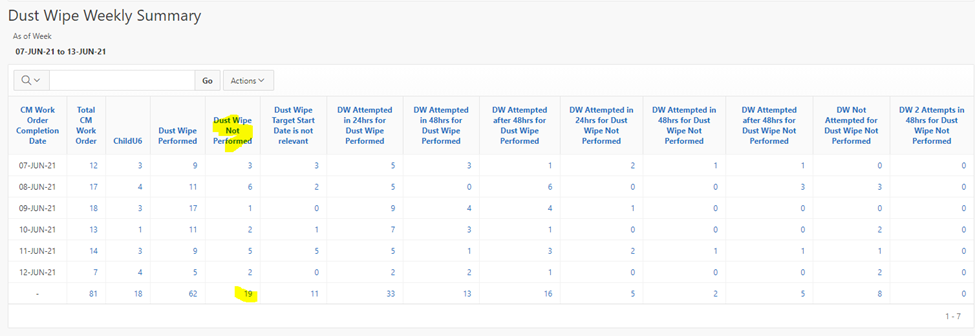

This is what the detailed report should look like:

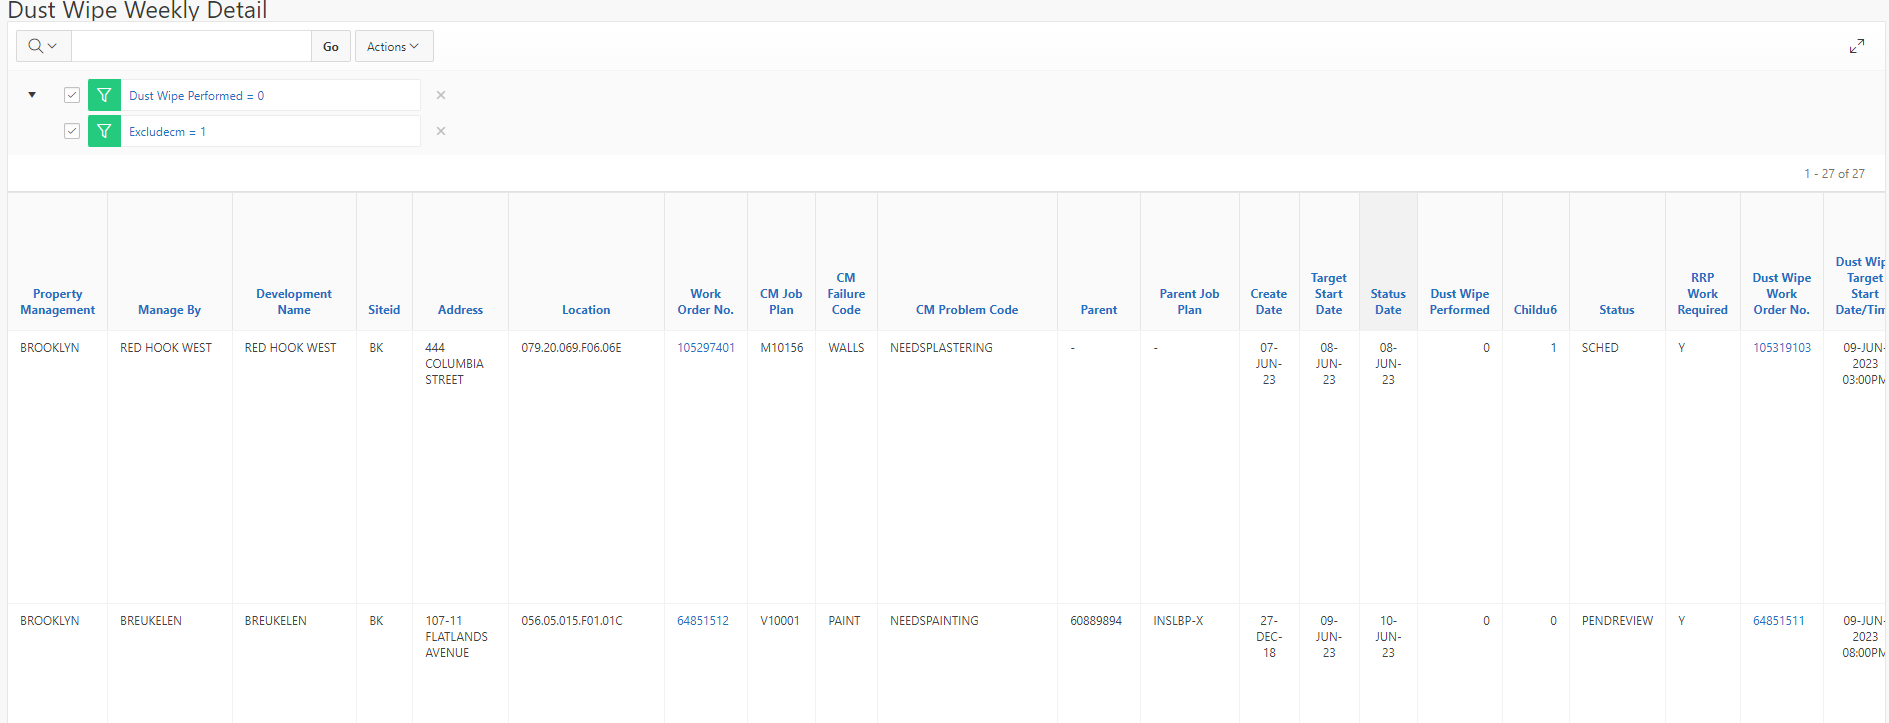

### Copy and Paste Into the Smartsheet

1. Open the smartsheet folder https://app.smartsheet.com/sheets/7wmjFRxMqwRrr9cmg25h8jhwwr4P4Q7x3Q2cXW31?view=grid
2. Copy and paste the data from this imported file to rows beneath the last entries in the “Dust Wipe Not Attempted or Performed-Weekly Detail” (NOTE: Use ctrl C to copy and ctrl V to paste into smartsheet, copy columns only up through last refresh date)
3. Save the smartsheet and email these people that it is updated:
  

### Updating Sheet 2
Download the detailed report data into a file called:  dustwipe_weekly_detail_not_performed.csv,  and run this code to output data to update sheet 2



In [ ]:
path

In [ ]:
import pandas as pd
#path = "C:\\Users\\MehriD01\\Documents\\Dust Wipe Weekly Report\\data\\"

dna = pd.read_csv(path + "dustwipe_weekly_detail_not_performed.csv")

print (len(dna))

dna = dna[dna["Dust Wipe Not Attempted for Dust Wipe Not performed"] == 1]

print (len(dna))

subset = ['Property Management', 'Manage By', 'Development Name', 'Siteid',
       'Address', 'Location', 'Work Order No.', 'CM Job Plan',
       'CM Failure Code', 'CM Problem Code', 'Parent', 'Parent Job Plan',
       'Create Date', 'Target Start Date', 'Status Date',
       'Dust Wipe Performed', 'Childu6', 'Status', 'RRP Work Required',
       'Dust Wipe Work Order No.', 'Dust Wipe Target Start Date/Time',
       'Dust Wipe Failure Code', 'Dust Wipe Problem Code',
       'CM Work Completion Date and Time', 
       'Dust Wipe Attempted in 24hrs for Dust Wipe Not performed',
       'Dust Wipe Attempted in 48hrs for Dust Wipe Not performed',
       'Dust Wipe Attempted after 48hrs for Dust Wipe Not performed',
       'Dust Wipe Not Attempted for Dust Wipe Not performed',
       'Dust Wipe Attempted in 24hrs for Dust Wipe performed',
       'Dust Wipe Attempted in 48hrs for Dust Wipe performed',
       'Dust Wipe Attempted after 48hrs for Dust Wipe performed',
       'Dust Wipe Attempted Twice in 48hrs for Dust Wipe Not performed',
       'Dw Isnotrelevant Cmlastlab', 'Dust Wipe Category',
       'Week start date', 'Week end date', 'Last refresh date']

dna = dna[subset]

dna = dna.reset_index(drop=True)
for i in range(len(dna)):
    if dna["Target Start Date"][i] == "-":
        print (dna["Target Start Date"][i])
        dna.loc[i, "Target Start Date"] = ""

dna.to_csv(path + "dustwipe_weekly_detail_not_performed_output.csv", index=False)

In [ ]:
path

In [ ]:
cols = dna.columns
cols

### Sheet 5: Dust Wipe Progress Tracking
The below code pulls the data and exports it into a file called dustwipe_progress_tracking.csv, copy and past this into Sheet 5

In [ ]:
import datetime
print (str(datetime.datetime.today()) )

print ("Import Dust Wipe Progress Tracking")
import time
start = time.time()


DIALECT = ''
SQL_DRIVER = ''
USERNAME = '' #enter your username
PASSWORD = '' #enter your password
#HOST = 'exadm1-scan' #enter the oracle db host url
HOST = '' #enter the oracle db host url

PORT = 1521 # enter the oracle port number
SERVICE = '' # enter the oracle db service name
ENGINE_PATH = DIALECT + '+' + SQL_DRIVER + '://' + USERNAME + ':' + PASSWORD +'@' + HOST + ':' + str(PORT) + '/?service_name=' + SERVICE

#engine = create_engine(ENGINE_PATH)

import pandas as pd


workorder_query = """
SELECT WEEK_START_DATE, WEEK_END_DATE, TOTAL_DUSTWIPE, TOTAL_FAIL, TOTAL_PASS, TOTAL_PENDING, DWFAIL_PERFIN24, DWFAIL_PERF24TO48, DWFAIL_PERFGREATER48, DWFAIL_NOTPERFIN24, DWFAIL_NOTPERF24TO48, DWFAIL_NOTPERFGREATER48, DWFAIL_NOTATTEMPTED, TOTALPENDING_CAPSAMPLE, TOTALPENDING_LABOR, TOTALPENDING_NOLABOR, DW_PASSAFTERFAIL, DW_PASSIN1ATMPT FROM (select "WEEK_START_DATE","WEEK_END_DATE","TOTAL_DUSTWIPE","TOTALPENDING_NOLABOR","TOTAL_PASS","TOTAL_PENDING","TOTAL_FAIL","DW_PASSIN1ATMPT","DW_PASSAFTERFAIL","TOTALPENDING_CAPSAMPLE","TOTALPENDING_LABOR","DWFAIL_PERFIN24","DWFAIL_PERF24TO48","DWFAIL_PERFGREATER48","DWFAIL_NOTPERFIN24","DWFAIL_NOTPERF24TO48","DWFAIL_NOTPERFGREATER48","DWFAIL_NOTATTEMPTED"
from ((select /*+ qb_name(apex$inner) */d."WEEK_START_DATE",d."WEEK_END_DATE",d."TOTAL_DUSTWIPE",d."TOTALPENDING_NOLABOR",d."TOTAL_PASS",d."TOTAL_PENDING",d."TOTAL_FAIL",d."DW_PASSIN1ATMPT",d."DW_PASSAFTERFAIL",d."TOTALPENDING_CAPSAMPLE",d."TOTALPENDING_LABOR",d."DWFAIL_PERFIN24",d."DWFAIL_PERF24TO48",d."DWFAIL_PERFGREATER48",d."DWFAIL_NOTPERFIN24",d."DWFAIL_NOTPERF24TO48",d."DWFAIL_NOTPERFGREATER48",d."DWFAIL_NOTATTEMPTED" from (----dustwipe tracking report summary

with two_week as
(
SELECT
WEEK_START_DATE,
WEEK_END_DATE,
DENSE_RANK() OVER (ORDER BY WEEK_START_DATE desc) date_rank_num
FROM
APEXMAX.DUSTWIPE_HOURLY_HSTRY
),

dutwipe_tracking as
(
select Z.*,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) then 1 else 0 end ) FAIL,
(case when ((DW_PENDING=1) or
((DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0 ) and (exists (select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(Z.ZZWODUSTWIPE,Z.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=Z.siteid )))
)then 1 else 0 end ) PENDING,

(case when (DW_PENDING=1) then 1 else 0 end ) PENDING_CAPSAMPLE,

(case when ( DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0)
and (exists (select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(Z.ZZWODUSTWIPE,Z.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=Z.siteid
--and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME) )) >= Z.changedate
)) then 1 else 0 end ) PENDING_LABOR,

(case when ( DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0
and not exists(select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(Z.ZZWODUSTWIPE,Z.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=Z.siteid
--and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) >= Z.changedate
)) then 1 else 0 end ) PENDING_NOLABOR,

(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT-changedate < 24 then 1 else 0 end) DWFAIL_PERFIN24,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT-changedate between 24 and 48 then 1 else 0 end) DWFAIL_PERF24TO48,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT-changedate > 48 then 1 else 0 end) DWFAIL_PERFGREATER48,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT is null and DWNOTPERF_AFTERRESULT-changedate < 24 then 1 else 0 end) DWFAIL_NOTPERFIN24,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT is null and DWNOTPERF_AFTERRESULT-changedate between 24 and 48 then 1 else 0 end) DWFAIL_NOTPERF24TO48,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT is null and DWNOTPERF_AFTERRESULT-changedate > 48 then 1 else 0 end) DWFAIL_NOTPERFGREATER48
from
(
select B.*,
(case when ( (B.DW_FAIL=1 or B.DWPENDING_HADFAIL=1)
and exists(select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate ))
then 1 else 0 end) DWFAIL_PERFORM,

(case when ((B.DW_FAIL=1 or B.DWPENDING_HADFAIL=1)
and exists( select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE !='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate ))
then 1 else 0 end) DWFAIL_ATTEMPT,

( SELECT MIN (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate )
DWPERF_AFTERRESULT,
( SELECT MIN (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE !='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate )
DWNOTPERF_AFTERRESULT,
(case when ((B.DW_FAIL=1 or B.DWPENDING_HADFAIL=1)
and not exists( select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate ))
then 1 else 0 end) DWFAIL_NOTATTEMPTED
from
(
select A.*,
w.zzwodustwipe ,
(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') and D.changedate=( SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
) ) THEN 1 ELSE 0 END) DW_FAIL,



(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.STATE='PASSED' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
) ) THEN 1 ELSE 0 END) DW_PASS,

(CASE WHEN (EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE='PASSED' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
-- and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
) ) and
EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE')))
THEN 1 ELSE 0 END) DW_PASSAFTERFAIL,

(CASE WHEN (EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE='PASSED' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
) ) and
NOT EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE')))
THEN 1 ELSE 0 END) DW_PASSIN1ATMPT,

(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.state='CAPTURED SAMPLE' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
)
)
AND NOT EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') ) THEN 1 ELSE 0 END) DW_PENDING,

(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.state='CAPTURED SAMPLE' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
)
)
AND EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') ) THEN 1 ELSE 0 END) DWPENDING_HADFAIL,

(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.state='CAPTURED SAMPLE' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
-- and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
)
)
AND EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') )
then (SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = NVL(w.zzwodustwipe,A.DUST_WO)
and B2.siteid=A.siteid
--and b2.parent=A.parent
and nvl(b2.parent,'XX')=nvl(A.parent,'XX')
and B2.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE')
)
else (SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = NVL(w.zzwodustwipe,A.DUST_WO)
and B2.siteid=A.siteid
--and b2.parent=A.parent
and nvl(b2.parent,'XX')=nvl(A.parent,'XX')
)
end )
changedate

from APEXMAX.DUSTWIPE_HOURLY_HSTRY A JOIN WORKORDER W ON A.WONUM=W.WONUM
and A.WEEK_START_DATE in (select distinct WEEK_START_DATE from two_week where date_rank_num in (1,2))
and A.dust_wo is not null

) B
) Z
),

dutwipe_tracking_daily as
(
select Z.*,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) then 1 else 0 end ) FAIL,
(case when ((DW_PENDING=1) or
((DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0 ) and exists(select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(Z.ZZWODUSTWIPE,Z.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=Z.siteid ))
) then 1 else 0 end ) PENDING,

(case when (DW_PENDING=1) then 1 else 0 end ) PENDING_CAPSAMPLE,

(case when ( DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0
and exists(select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(Z.ZZWODUSTWIPE,Z.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=Z.siteid
--and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME) )) >= Z.changedate
)) then 1 else 0 end ) PENDING_LABOR,

(case when ( DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0
and not exists(select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(Z.ZZWODUSTWIPE,Z.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=Z.siteid
--and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) >= Z.changedate
)) then 1 else 0 end ) PENDING_NOLABOR,

(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT-changedate < 24 then 1 else 0 end) DWFAIL_PERFIN24,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT-changedate between 24 and 48 then 1 else 0 end) DWFAIL_PERF24TO48,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT-changedate > 48 then 1 else 0 end) DWFAIL_PERFGREATER48,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT is null and DWNOTPERF_AFTERRESULT-changedate < 24 then 1 else 0 end) DWFAIL_NOTPERFIN24,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT is null and DWNOTPERF_AFTERRESULT-changedate between 24 and 48 then 1 else 0 end) DWFAIL_NOTPERF24TO48,
(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) and DWPERF_AFTERRESULT is null and DWNOTPERF_AFTERRESULT-changedate > 48 then 1 else 0 end) DWFAIL_NOTPERFGREATER48
from
(
select B.*,
(case when ((B.DW_FAIL=1 or B.DWPENDING_HADFAIL=1)
and exists(select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate ))
then 1 else 0 end) DWFAIL_PERFORM,

(case when ((B.DW_FAIL=1 or B.DWPENDING_HADFAIL=1)
and exists( select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE !='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate ))
then 1 else 0 end) DWFAIL_ATTEMPT,

( SELECT MIN (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE ='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate )
DWPERF_AFTERRESULT,
( SELECT MIN (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.TRANSTYPE !='INSPECTION' and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate )
DWNOTPERF_AFTERRESULT,
(case when ((B.DW_FAIL=1 or B.DWPENDING_HADFAIL=1)
and not exists( select 1 from maximo.LABTRANS LT WHERE LT.REFWO=NVL(B.ZZWODUSTWIPE,B.DUST_WO) and LT.siteid=B.siteid and (TRUNC(LT.STARTDATE) + (LT.STARTTIME - TRUNC(LT.STARTTIME))) > B.changedate ))
then 1 else 0 end) DWFAIL_NOTATTEMPTED
from
(
select A.*,
w.zzwodustwipe,
(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') and D.changedate=( SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
) ) THEN 1 ELSE 0 END) DW_FAIL,



(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE='PASSED' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
) ) THEN 1 ELSE 0 END) DW_PASS,


(CASE WHEN (EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE='PASSED' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
) ) and
EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE')))
THEN 1 ELSE 0 END) DW_PASSAFTERFAIL,

(CASE WHEN (EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE='PASSED' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
) ) and
NOT EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE')))
THEN 1 ELSE 0 END) DW_PASSIN1ATMPT,

(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.state='CAPTURED SAMPLE' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
)
)
AND NOT EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') ) THEN 1 ELSE 0 END) DW_PENDING,

(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.state='CAPTURED SAMPLE' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
)
)
AND EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') ) THEN 1 ELSE 0 END) DWPENDING_HADFAIL,

(CASE WHEN EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO) =D.REFWO AND D.state='CAPTURED SAMPLE' and D.changedate=(SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = D.REFWO
and B2.siteid=D.siteid
--and b2.parent=D.parent
and nvl(b2.parent,'XX')=nvl(D.parent,'XX')
)
)
AND EXISTS (SELECT 1 FROM MAXIMO.zzdwbatch D WHERE NVL(w.zzwodustwipe,A.DUST_WO)=D.REFWO AND D.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE') )
then (SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = NVL(w.zzwodustwipe,A.DUST_WO)
and B2.siteid=A.siteid
--and b2.parent=A.parent
and nvl(b2.parent,'XX')=nvl(A.parent,'XX')
and B2.STATE in ('FAILED VISUAL PAINT','FAILED DUST WIPE')
)
else (SELECT MAX(changedate)
FROM MAXIMO.zzdwbatch B2
WHERE B2.refwo = NVL(w.zzwodustwipe,A.DUST_WO)
and B2.siteid=A.siteid
--and b2.parent=A.parent
and nvl(b2.parent,'XX')=nvl(A.parent,'XX')
)
end )
changedate

from APEXMAX.DUSTWIPE_HOURLY_WO A JOIN WORKORDER W ON A.WONUM=W.WONUM
--where A.WEEK_START_DATE in (select distinct WEEK_START_DATE from two_week where date_rank_num in (1,2))
and A.lab_latest_date > (select max(WEEK_END_DATE) from APEXMAX.DUSTWIPE_HOURLY_HSTRY)
and A.dust_wo is not null

) B
) Z
)

select
A.WEEK_START_DATE,
A.WEEK_END_DATE,
count(*) Total_Dustwipe,
sum(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) then 1 else 0 end ) Total_Fail,
sum(DW_PASS) Total_Pass,
sum(DW_PASSAFTERFAIL) DW_PASSAFTERFAIL,
sum(DW_PASSIN1ATMPT) DW_PASSIN1ATMPT,
--sum(case when (DW_PENDING=1) or (DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0 ) then 1 else 0 end ) Total_PENDING,
sum(PENDING) Total_PENDING,
sum(PENDING_CAPSAMPLE) TotalPENDING_CAPSAMPLE,
sum(PENDING_LABOR) TotalPENDING_LABOR,
sum(PENDING_NOLABOR) TotalPENDING_NOLABOR,

sum(DWFAIL_PERFIN24) DWFAIL_PERFIN24,
sum(DWFAIL_PERF24TO48) DWFAIL_PERF24TO48,
sum(DWFAIL_PERFGREATER48) DWFAIL_PERFGREATER48,
sum(DWFAIL_NOTPERFIN24) DWFAIL_NOTPERFIN24,
sum(DWFAIL_NOTPERF24TO48) DWFAIL_NOTPERF24TO48,
sum(DWFAIL_NOTPERFGREATER48) DWFAIL_NOTPERFGREATER48,
sum(DWFAIL_NOTATTEMPTED) DWFAIL_NOTATTEMPTED

from dutwipe_tracking A
where A.WEEK_START_DATE = (select distinct WEEK_START_DATE from two_week where date_rank_num =1)
and A.dust_wo is not null
group by WEEK_START_DATE,
WEEK_END_DATE
union
select
A.WEEK_START_DATE,
A.WEEK_END_DATE,
count(*) Total_Dustwipe,
sum(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) then 1 else 0 end ) Total_Fail,
sum(DW_PASS) Total_Pass,
sum(DW_PASSAFTERFAIL) DW_PASSAFTERFAIL,
sum(DW_PASSIN1ATMPT) DW_PASSIN1ATMPT,
--sum(case when (DW_PENDING=1) or (DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0) then 1 else 0 end ) Total_PENDING,
sum(PENDING) Total_PENDING,
sum(PENDING_CAPSAMPLE) TotalPENDING_CAPSAMPLE,
sum(PENDING_LABOR) TotalPENDING_LABOR,
sum(PENDING_NOLABOR) TotalPENDING_NOLABOR,
sum(DWFAIL_PERFIN24) DWFAIL_PERFIN24,
sum(DWFAIL_PERF24TO48) DWFAIL_PERF24TO48,
sum(DWFAIL_PERFGREATER48) DWFAIL_PERFGREATER48,
sum(DWFAIL_NOTPERFIN24) DWFAIL_NOTPERFIN24,
sum(DWFAIL_NOTPERF24TO48) DWFAIL_NOTPERF24TO48,
sum(DWFAIL_NOTPERFGREATER48) DWFAIL_NOTPERFGREATER48,
sum(DWFAIL_NOTATTEMPTED) DWFAIL_NOTATTEMPTED
from dutwipe_tracking A
where A.WEEK_START_DATE = (select distinct WEEK_START_DATE from two_week where date_rank_num =2)
and A.dust_wo is not null
group by WEEK_START_DATE,
WEEK_END_DATE
union
select
(select max(A.WEEK_END_DATE) + 1 from APEXMAX.DUSTWIPE_HOURLY_HSTRY A) WEEK_START_DATE,
sysdate WEEK_END_DATE,
count(*) Total_Dustwipe,
sum(case when (DW_FAIL=1 or DWPENDING_HADFAIL=1) then 1 else 0 end ) Total_Fail,
sum(DW_PASS) Total_Pass,
sum(DW_PASSAFTERFAIL) DW_PASSAFTERFAIL,
sum(DW_PASSIN1ATMPT) DW_PASSIN1ATMPT,
--sum(case when (DW_PENDING=1) or (DW_FAIL=0 and DW_PASS=0 and DW_PENDING=0 and DWPENDING_HADFAIL=0 ) then 1 else 0 end ) Total_PENDING,
sum(PENDING) Total_PENDING,
sum(PENDING_CAPSAMPLE) TotalPENDING_CAPSAMPLE,
sum(PENDING_LABOR) TotalPENDING_LABOR,
sum(PENDING_NOLABOR) TotalPENDING_NOLABOR,
sum(DWFAIL_PERFIN24) DWFAIL_PERFIN24,
sum(DWFAIL_PERF24TO48) DWFAIL_PERF24TO48,
sum(DWFAIL_PERFGREATER48) DWFAIL_PERFGREATER48,
sum(DWFAIL_NOTPERFIN24) DWFAIL_NOTPERFIN24,
sum(DWFAIL_NOTPERF24TO48) DWFAIL_NOTPERF24TO48,
sum(DWFAIL_NOTPERFGREATER48) DWFAIL_NOTPERFGREATER48,
sum(DWFAIL_NOTATTEMPTED) DWFAIL_NOTATTEMPTED
from dutwipe_tracking_daily A
where A.dust_wo is not null
group by
sysdate
) d
)) i
) i where 1=1


"""



df = pd.read_sql_query(workorder_query, engine)

#df = pd.read_csv(path + "dustwipe_progress_tracking.csv")
#df = df.rename(columns={'Dust Wipe not taken': 'Dust Wipe Not Taken'})
#df = df.rename(columns={'Dust Wipe Passed in first attempt': 'Dust Wipe Passed in First Attempt'})
#df = df.rename(columns={'Dust Wipe Passed after Failure': 'Dust Wipe Passed After Failure'})
#df = df.rename(columns={'Dust Wipe Pending Lab Result': 'Dust Wipe Pending Lab Results'})
#df = df.rename(columns={'Dust Wipe Pending as No Batch entry.': 'Dust Wipe Pending as No Batch Entry'})
#df = df.rename(columns={'Dust Wipe Failed and Re-Performed in 24hrs': 'Dust Wipe Failed and Re-Performed in 24 Hrs'})
#df = df.rename(columns={'Dust Wipe Failed and Re-Performed between 24hrs to 48hrs': 'Dust Wipe Failed and Re-Performed in 24 to 48 Hrs'})
#df = df.rename(columns={'Dust Wipe Failed and Re-Performed after 48 hrs': 'Dust Wipe Failed and Re-Performed after 48 Hrs'})
#df = df.rename(columns={'Dust Wipe Failed and Re-Attempted in 24 hrs': 'Dust Wipe Failed and Re-Attempted in 24 Hrs'})
#df = df.rename(columns={'Dust Wipe Failed and Re-Attempted between 24 hrs to 48 hrs': 'Dust Wipe Failed and Re-Attempted in 24 to 48 Hrs'})
#df = df.rename(columns={'Dust Wipe Failed and Re-Attempted after 48 hrs': 'Dust Wipe Failed and Re-Attempted after 48 Hrs'})





df = df.rename(columns={'week_start_date': 'Week Start Date'})
df = df.rename(columns={'week_end_date': 'Week End Date'})
df = df.rename(columns={'total_dustwipe': 'CM Work Order'})
df = df.rename(columns={'total_fail': 'Fail'})
df = df.rename(columns={'total_pass': 'Pass'})
df = df.rename(columns={'total_pending': 'Pending'})
df = df.rename(columns={'totalpending_nolabor': 'Dust Wipe Not Taken'})
df = df.rename(columns={'dw_passin1atmpt': 'Dust Wipe Passed in First Attempt'})
df = df.rename(columns={'dw_passafterfail': 'Dust Wipe Passed After Failure'})
df = df.rename(columns={'totalpending_capsample': 'Dust Wipe Pending Lab Results'})
df = df.rename(columns={'totalpending_labor': 'Dust Wipe Pending as No Batch Entry'})
df = df.rename(columns={'dwfail_perfin24': 'Dust Wipe Failed and Re-Performed in 24 Hrs'})
df = df.rename(columns={'dwfail_perf24to48': 'Dust Wipe Failed and Re-Performed in 24 to 48 Hrs'})
df = df.rename(columns={'dwfail_perfgreater48': 'Dust Wipe Failed and Re-Performed after 48 Hrs'})
df = df.rename(columns={'dwfail_notperfin24': 'Dust Wipe Failed and Re-Attempted in 24 Hrs'})
df = df.rename(columns={'dwfail_notperf24to48': 'Dust Wipe Failed and Re-Attempted in 24 to 48 Hrs'})
df = df.rename(columns={'dwfail_notperfgreater48': 'Dust Wipe Failed and Re-Attempted after 48 Hrs'})
#df = df.rename(columns={'dwfail_notperf24to48': 'Dust Wipe Failed and Not Re-Attempted or Performed'})
df = df.rename(columns={'dwfail_notattempted': 'Dust Wipe Failed and Not Re-Attempted or Performed'})



subset = ["Week Start Date", "Week End Date", "CM Work Order", "Dust Wipe Not Taken", "Pass", "Pending", "Fail",
         "Dust Wipe Passed in First Attempt", "Dust Wipe Passed After Failure", "Dust Wipe Pending Lab Results", 
         "Dust Wipe Pending as No Batch Entry", "Dust Wipe Failed and Re-Performed in 24 Hrs", 
         "Dust Wipe Failed and Re-Performed in 24 to 48 Hrs", "Dust Wipe Failed and Re-Performed after 48 Hrs",
         "Dust Wipe Failed and Re-Attempted in 24 Hrs", "Dust Wipe Failed and Re-Attempted in 24 to 48 Hrs",
         "Dust Wipe Failed and Re-Attempted after 48 Hrs", "Dust Wipe Failed and Not Re-Attempted or Performed"]

df = df[subset]

df.rename(columns={'Week Start Date': 'Start Date'}, inplace=True)
df.rename(columns={'Week End Date': 'End Date'}, inplace=True)


df.to_csv(path + "dustwipe_progress_tracking_output.csv", index=False )

print ("DONE")



In [ ]:
df

### Sheet 4: Dust Wipe Addressed Weekly
The below code pulls the data and exports it into a file called dustwipe_addressed_weekly.csv, copy and past this into Sheet 4

In [ ]:
import datetime
print (str(datetime.datetime.today()) )

print ("Import DW Addressed Weekly")
import time
start = time.time()


DIALECT = ''
SQL_DRIVER = ''
USERNAME = '' #enter your username
PASSWORD = '' #enter your password
#HOST = 'exadm1-scan' #enter the oracle db host url
HOST = '' #enter the oracle db host url

PORT = 1521 # enter the oracle port number
SERVICE = '' # enter the oracle db service name
ENGINE_PATH = DIALECT + '+' + SQL_DRIVER + '://' + USERNAME + ':' + PASSWORD +'@' + HOST + ':' + str(PORT) + '/?service_name=' + SERVICE

#engine = create_engine(ENGINE_PATH)

import pandas as pd


workorder_query = """

SELECT DWDATE, DW_COUNT, DW_PERFORM, DW_ATTEMPTED, CHILDU6_COUNT FROM (select "DWDATE","DW_COUNT","DW_PERFORM","DW_ATTEMPTED","CHILDU6_COUNT"
from ((select /*+ qb_name(apex$inner) */d."DWDATE",d."DW_COUNT",d."DW_PERFORM",d."DW_ATTEMPTED",d."CHILDU6_COUNT" from (select
to_date(DW_DATE,'DD-MON-YY') DWDATE,
count(*) DW_COUNT,
sum(case when LABCNT_INSP=1 then 1 else 0 end) DW_PERFORM,
sum(case when LABCNT_OTHERS=1 then 1 else 0 end) DW_ATTEMPTED,
sum(childu6) CHILDU6_COUNT
from
apexmax.DW_LABTRANS_DETAIL
group by to_date(DW_DATE,'DD-MON-YY')
union

select
null DWDATE,
count(*) DW_COUNT,
sum(case when LABCNT_INSP=1 then 1 else 0 end) DW_PERFORM,
sum(case when LABCNT_OTHERS=1 then 1 else 0 end) DW_ATTEMPTED,
sum(childu6) CHILDU6_COUNT
from
apexmax.DW_LABTRANS_DETAIL
order by DWDATE
) d
)) i
) i where 1=1

"""

df = pd.read_sql_query(workorder_query, engine)


#df = pd.read_csv(path + "dustwipe_addressed_weekly.csv")
#df = df[0: len(df)-1]






df = df.rename(columns={'dwdate': 'Dust Wipe Addressed Date'})
df = df.rename(columns={'dw_count': 'Dust Wipe Addressed'})
df = df.rename(columns={'dw_perform': 'Dust Wipe Performed'})
df = df.rename(columns={'dw_attempted': 'Dust Wipe Attempted'})
df = df.rename(columns={'childu6_count': 'Child Under 6'})
df['Dust Wipe Addressed Date'] = pd.to_datetime(df['Dust Wipe Addressed Date'])
df['Dust Wipe Addressed Date']  = df['Dust Wipe Addressed Date'].apply(lambda x: x.date())



#end_date = end_date + pd.Timedelta(days=1)

mask = (df['Dust Wipe Addressed Date'] >= start_date) & (df['Dust Wipe Addressed Date'] <= end_date)
df = df.loc[mask]



df["Dust Wipe Addressed Date"] = df["Dust Wipe Addressed Date"].astype(str)

df["year"] =  df['Dust Wipe Addressed Date'].str.split("-").str[0]
df["month"] =  df['Dust Wipe Addressed Date'].str.split("-").str[1]
df["day"] =  df['Dust Wipe Addressed Date'].str.split("-").str[2]


df["Dust Wipe Addressed Date"] = df["year"]+"-"+df["month"]+"-"+df["day"]

df.columns = df.columns.str.strip()

df = df[["Dust Wipe Addressed Date", "Dust Wipe Addressed", "Dust Wipe Performed", "Dust Wipe Attempted", "Child Under 6"]]


df.to_csv(path + "dustwipe_addressed_weekly_output.csv", index=False )

print ("DONE")





In [ ]:
start_date

In [ ]:
end_date

In [ ]:
df

### Sheet 3 Follow-up Status

On Thursday Endi will contact you that the smartsheet has been updated, the sheet is located here but will be pulled automatically using below script:
https://app.smartsheet.com/sheets/7wmjFRxMqwRrr9cmg25h8jhwwr4P4Q7x3Q2cXW31?view=grid
and run this code, paste the data into sheet 3

In [ ]:
start_date, end_date

In [ ]:
import pandas as pd
import datetime
import smartsheet

# Initialize the Smartsheet client with the token from smartsheet
smartsheet_client = smartsheet.Smartsheet('')
print (smartsheet_client)

print (str(datetime.datetime.today()) )

#path = "C:\\Users\\MehriD01\\Documents\\Dust Wipe Weekly Report\\data\\"

#df = pd.read_csv(path + "Dust Wipe Not Attempted or Performed-Weekly Detail.csv")

print ("Import using direct connect")

sheet_id = '7wmjFRxMqwRrr9cmg25h8jhwwr4P4Q7x3Q2cXW31'
sheet = smartsheet_client.Sheets.get_sheet(sheet_id)
# Extract column names from the sheet
columns = [column.title for column in sheet.columns]
# Extract row data from the sheet
rows = []
for row in sheet.rows:
    row_data = [cell.value for cell in row.cells]
    rows.append(row_data)
# Create a Pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

df['Week start date'] = pd.to_datetime(df['Week start date'])
df['Week end date'] = pd.to_datetime(df['Week end date'])

df['Week start date'] = df['Week start date'].apply(lambda x: x.date())
df['Week end date'] = df['Week end date'].apply(lambda x: x.date())


print (len(df))

mask = (df['Week start date'] >= start_date) & (df['Week end date'] <= end_date)

df = df.loc[mask]

print (len(df))


df["Dust Wipe Attempted in 24hrs for Dust Wipe Not pe"] = df["Dust Wipe Attempted in 24hrs for Dust Wipe Not pe"].astype(str)
df["Dust Wipe Not Attempted for Dust Wipe Not perform"] = df["Dust Wipe Not Attempted for Dust Wipe Not perform"].astype(str)

df = df[["Status of Follow-up (drop down)", "Dust Wipe Not Attempted for Dust Wipe Not perform", "Dust Wipe Attempted in 24hrs for Dust Wipe Not pe"]]

dropdown_list = ["No DW needed",
"Report not picking up attempts and/or dust wipes",
"Consolidated",
"No DW created",
"Sent out for data entry creation",
"DW needed",
"Sent out for attempts",
"DW taken",
"Failed visual",
"Passed",
"New CM work but previous passed DW",
"Missing an update"
]

qn = pd.DataFrame(columns=('Status (by week ending date)', 'DW Attempted for Dust Wipe Not Performed', 'DW Not Attempted for Dust Wipe Not Performed'))


for i in range (len(dropdown_list)):
    qn.loc[i] = [dropdown_list[i], 0, 0]

df1 = df[df["Dust Wipe Attempted in 24hrs for Dust Wipe Not pe"] == "True"]
df1 = df1[["Status of Follow-up (drop down)"]]
df1["Count"] = 1
df1G = df1.groupby(['Status of Follow-up (drop down)']).sum()
df1G = df1G.add_suffix('').reset_index()
df1Dic = df1G.set_index('Status of Follow-up (drop down)')['Count'].to_dict()
qn["DW Attempted for Dust Wipe Not Performed"] = qn["Status (by week ending date)"].map(df1Dic)
qn["DW Attempted for Dust Wipe Not Performed"] = qn["DW Attempted for Dust Wipe Not Performed"].fillna(0)

df2 = df[df["Dust Wipe Not Attempted for Dust Wipe Not perform"] == "True"]
df2 = df2[["Status of Follow-up (drop down)"]]
df2["Count"] = 1
df2G = df2.groupby(['Status of Follow-up (drop down)']).sum()
df2G = df2G.add_suffix('').reset_index()

df2Dic = df2G.set_index('Status of Follow-up (drop down)')['Count'].to_dict()
qn["DW Not Attempted for Dust Wipe Not Performed"] = qn["Status (by week ending date)"].map(df2Dic)
qn["DW Not Attempted for Dust Wipe Not Performed"] = qn["DW Not Attempted for Dust Wipe Not Performed"].fillna(0)

qn["Total"] = qn["DW Attempted for Dust Wipe Not Performed"] + qn["DW Not Attempted for Dust Wipe Not Performed"]

#sums the columns
qn.loc['Total'] = qn.sum(numeric_only=True)

pd.set_option('chained_assignment', None)
qn["Status (by week ending date)"]["Total"] = "Total"

qn.to_csv(path + "Follow_Up_Status_output.csv", index=False)

print ("DONE")


In [ ]:
path

In [ ]:
len(qn)-1

In [ ]:
qn

### EMAIL

After inserting the follow up status, insert the data, save the file and send to these people:
